In [1]:
%matplotlib inline
#Dependenices and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"

ride_data_to_load = "data/ride_data.csv"

#Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

#Combine the data into a single dataset
pyber_df = pd.merge(ride_data, city_data, on="city", how="left")

#Display the data table for preview
pyber_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [2]:
#Read combine data into a single dataset
city_df = pd.DataFrame(city_data)
print(city_df)

ride_df = pd.DataFrame(ride_data)

                     city  driver_count      type
0             Richardfort            38     Urban
1            Williamsstad            59     Urban
2             Port Angela            67     Urban
3              Rodneyfort            34     Urban
4             West Robert            39     Urban
5            West Anthony            70     Urban
6             West Angela            48     Urban
7           Martinezhaven            25     Urban
8               Karenberg            22     Urban
9             Barajasview            26     Urban
10             Robertport            12     Urban
11           Joneschester            39     Urban
12                Leahton            17     Urban
13   West Christopherberg            32     Urban
14                Johnton            27     Urban
15           Reynoldsfurt            67     Urban
16             Port David             7     Urban
17    New Kimberlyborough            33     Urban
18            Carriemouth            52     Urban


## Bubble Plot of Ride Sharing Data

In [3]:
# Obtain the x and y coordinates for each of the three city types

# Build the scatter plots for each city types

# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size

# Save Figure

urban_city_type = pyber_df[pyber_df["type"] == "Urban"].groupby([pyber_df["city"]])
suburban_city_type = pyber_df[pyber_df["type"] == "Suburban"].groupby([pyber_df["city"]])
rural_city_type = pyber_df[pyber_df["type"] == "Rural"].groupby([pyber_df["city"]])

#Urban calculations of ride count (x), average fare(y), average driver count(s as in size)
x_urban = urban_city_type["ride_id"].count()
y_urban = urban_city_type["fare"].mean()
s_urban = urban_city_type["driver_count"].mean()


#Suburban calculations of ride count(x), average fare(y), average driver counts(s as in size)
x_suburban = suburban_city_type["ride_id"].count()
y_suburban = suburban_city_type["fare"].mean()
s_suburban = suburban_city_type["driver_count"].mean()


#Rural calculations of ride count(x), avarage fare(y), average driver counts(s as in size)
x_rural = rural_city_type["ride_id"].count()
y_rural = rural_city_type["fare"].mean()
s_rural = rural_city_type["driver_count"].mean()


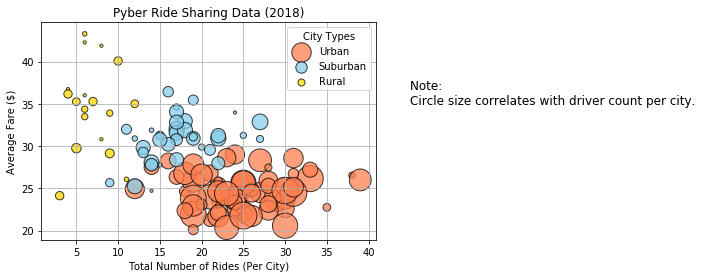

In [4]:
#Make the scatter plots for each city types
plt.scatter(x_urban, y_urban, label = "Urban", s=s_urban * 10, color=["Coral"],edgecolor="black", alpha = 0.75, marker="o")
plt.scatter(x_suburban, y_suburban, label = "Suburban", s=s_suburban * 10, color=["SkyBlue"], edgecolor="black", alpha = 0.75, marker="o")
plt.grid()
plt.scatter(x_rural, y_rural, label = "Rural", s=s_rural * 10, color=["Gold"], edgecolor="black", alpha = 0.75, marker="o")

#Incorporating the other graph properties
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2018)")

#Create a legend 
plt.legend(fontsize = 10, title="City Types", loc="best")

#Incorporate a text label regarding circle size 
plt.text(45,35,"Note: \nCircle size correlates with driver count per city.", fontsize = 12)

plt.show()

## Total Fares by City Type

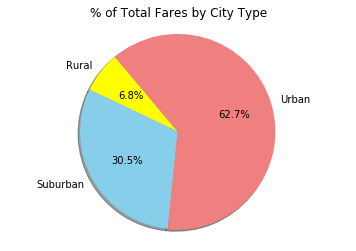

In [5]:
# Calculate Type Percents
type_percent = pyber_df.groupby(["type"]).sum()["fare"] / pyber_df["fare"].sum() * 100

# Build Pie Chart
plt.pie(type_percent,
        labels = ["Rural", "Suburban", "Urban"],
        colors = ["Yellow", "Skyblue", "LightCoral"],
        explode=[0,0,0],
        autopct="%1.1f%%",
        shadow=True,
        startangle=130)

plt.title("% of Total Fares by City Type")

plt.axis("equal")
        
# Save Figure
plt.savefig("../Images/pyber total fare.png")

# Show Figure
plt.show()

## Total Rides by City Type

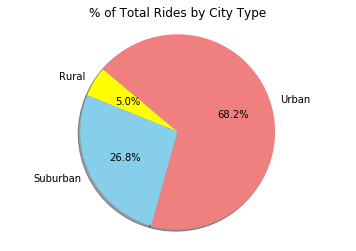

In [6]:
# Calculate Ride Percents
type_percent = pyber_df.groupby(["type"]).sum()["ride_id"] / pyber_df["ride_id"].count() * 100
# Build Pie Chart
plt.pie(type_percent,
        labels = ["Rural", "Suburban", "Urban"],
        colors = ["Yellow", "Skyblue", "LightCoral"],
        explode=[0,0,0],
        autopct="%1.1f%%",
        shadow=True,
        startangle=140)

plt.title("% of Total Rides by City Type")

plt.axis("equal")
        
# Save Figure
plt.savefig("../Images/pyber total ride.png")
# Save Figure

#Show figure
plt.show()

## Total Drivers by City Type

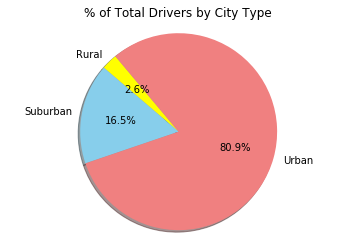

In [7]:
# Calculate Driver Percents
driver_percent = city_data.groupby(["type"]).sum()["driver_count"] / city_data["driver_count"].sum() * 100

# Build Pie Charts
plt.pie(driver_percent,
        labels = ["Rural", "Suburban", "Urban"],
        colors = ["Yellow", "Skyblue", "LightCoral"],
        explode=[0,0,0],
        autopct="%1.1f%%",
        shadow=True,
        startangle=130)

plt.title("% of Total Drivers by City Type")

plt.axis("equal")
# Save Figure
plt.savefig("../Images/pyber total drivers.png")

#Show Figure
plt.show()